In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

from warnings import filterwarnings
filterwarnings('ignore') 

np.random.seed(1234)

In [2]:
mu_feats = np.load('../train_data/AllGlobal_Mu_Final.npy')
std_feats = np.load('../train_data/AllGlobal_Std_Final.npy')

In [3]:
data = pd.read_csv('../test_data/TestOriginal.csv')

In [4]:
data.head()

,Unnamed: 0,APOGEE_ID,source_id,LOGG,TEFF,ALPHA_M,M_H,C_FE,N_FE,G,...,age_68l,ageErr,logAge,logAgeErr,distKpc,distKpc_68u,distKpc_68l,distErrKpc,logDistKpc,logDistKpcErr
0,1503,2M19290456+4307142,2125911779619216640,2.879289,4862.249023,0.036724,-0.181937,-0.023479,0.223800,11.524463,...,4.7830,1.53330,0.786808,0.107574,0.967112,0.982856,0.951393,0.015731,-0.014523,0.007065
1,1859,2M19370745+4519071,2079923026463469440,2.513793,4538.331055,0.086931,-0.010547,0.060921,0.187171,12.425525,...,8.2224,3.69990,1.052394,0.139372,1.645653,1.684561,1.612315,0.036123,0.216338,0.009518
2,2357,2M19460932+4745455,2086595344056333824,2.616982,4544.588379,0.007481,0.316487,0.013361,0.362091,12.677034,...,8.9187,2.20645,1.008102,0.087290,1.605608,1.627360,1.583689,0.021836,0.205640,0.005907
3,685,2M19102983+3859037,2099634967844670464,2.703944,4709.398926,-0.002344,0.056682,-0.081225,0.286097,11.843385,...,4.3152,1.57270,0.741223,0.118886,1.222850,1.245913,1.199085,0.023414,0.087373,0.008319
4,1640,2M19320870+4926497,2129817519799408128,2.408561,4732.571289,0.223508,-0.764912,0.039515,0.066366,11.714702,...,7.6736,3.22585,0.978272,0.132499,1.515842,1.543491,1.481835,0.030828,0.180654,0.008852


In [5]:
len(data)

583

In [6]:
feats = ['LOGG', 'TEFF', 'ALPHA_M', 'M_H', 'C_FE', 'N_FE', \
           'G', 'BP', 'RP', 'J', 'H', 'K']

featsErr = ['LOGG_ERR', 'TEFF_ERR', 'ALPHA_M_ERR', 'M_H_ERR', 'C_FE_ERR', 'N_FE_ERR', \
           'G_ERR', 'BP_ERR', 'RP_ERR', 'J_ERR', 'H_ERR', 'K_ERR']


In [7]:
for i in range(len(feats)):
    scaledFeat = (data[feats[i]] - mu_feats[i])/std_feats[i]
    scaledEFeat = data[featsErr[i]]/std_feats[i]

    data[feats[i]+'_NORM'] = scaledFeat
    data[featsErr[i]+'_NORM'] = scaledEFeat

In [8]:
data.head()

,Unnamed: 0,APOGEE_ID,source_id,LOGG,TEFF,ALPHA_M,M_H,C_FE,N_FE,G,...,BP_NORM,BP_ERR_NORM,RP_NORM,RP_ERR_NORM,J_NORM,J_ERR_NORM,H_NORM,H_ERR_NORM,K_NORM,K_ERR_NORM
0,1503,2M19290456+4307142,2125911779619216640,2.879289,4862.249023,0.036724,-0.181937,-0.023479,0.223800,11.524463,...,-0.534979,0.001340,-0.442837,0.000632,-0.347501,0.022224,-0.299855,0.019035,-0.289276,0.016749
1,1859,2M19370745+4519071,2079923026463469440,2.513793,4538.331055,0.086931,-0.010547,0.060921,0.187171,12.425525,...,0.282078,0.000897,0.223916,0.000818,0.394773,0.022224,0.343976,0.019035,0.319257,0.013399
2,2357,2M19460932+4745455,2086595344056333824,2.616982,4544.588379,0.007481,0.316487,0.013361,0.362091,12.677034,...,0.499692,0.001248,0.420564,0.000649,0.679237,0.023335,0.635100,0.019035,0.619616,0.017865
3,685,2M19102983+3859037,2099634967844670464,2.703944,4709.398926,-0.002344,0.056682,-0.081225,0.286097,11.843385,...,-0.193979,0.001279,-0.250455,0.000754,-0.213047,0.023335,-0.266264,0.022394,-0.264711,0.022331
4,1640,2M19320870+4926497,2129817519799408128,2.408561,4732.571289,0.223508,-0.764912,0.039515,0.066366,11.714702,...,-0.374545,0.001433,-0.296996,0.000541,-0.200824,0.023335,-0.174447,0.019035,-0.154170,0.017865


(array([  3.,   4.,  11.,  18.,  32.,  74., 193., 111.,  91.,  46.]),
 array([1.4344635 , 1.61695094, 1.79943838, 1.98192582, 2.16441326,
        2.3469007 , 2.52938814, 2.71187558, 2.89436302, 3.07685046,
        3.2593379 ]),
 <a list of 10 Patch objects>)

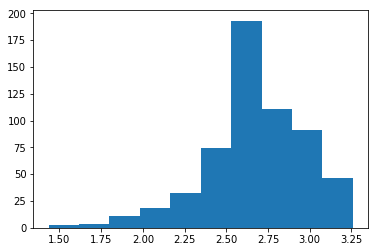

In [9]:
import matplotlib.pyplot as plt

plt.hist(data['LOGG'])

(array([  3.,   4.,  11.,  18.,  32.,  74., 193., 111.,  91.,  46.]),
 array([-4.07759928, -3.46904399, -2.86048869, -2.25193339, -1.64337809,
        -1.03482279, -0.4262675 ,  0.1822878 ,  0.7908431 ,  1.3993984 ,
         2.0079537 ]),
 <a list of 10 Patch objects>)

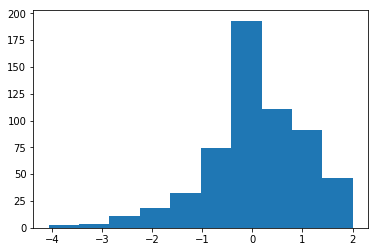

In [10]:
plt.hist(data['LOGG_NORM'])

(array([  3.,   4.,  11.,  18.,  32.,  74., 193., 111.,  91.,  46.]),
 array([-4.07759928, -3.46904399, -2.86048869, -2.25193339, -1.64337809,
        -1.03482279, -0.4262675 ,  0.1822878 ,  0.7908431 ,  1.3993984 ,
         2.0079537 ]),
 <a list of 10 Patch objects>)

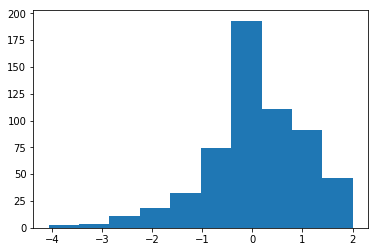

In [11]:
plt.hist((data['LOGG'] - mu_feats[0])/std_feats[0])

(array([  3.,   6.,  10.,  19.,  60., 136., 162.,  95.,  64.,  28.]),
 array([-3.79841564, -3.20459073, -2.61076581, -2.0169409 , -1.42311599,
        -0.82929107, -0.23546616,  0.35835876,  0.95218367,  1.54600858,
         2.1398335 ]),
 <a list of 10 Patch objects>)

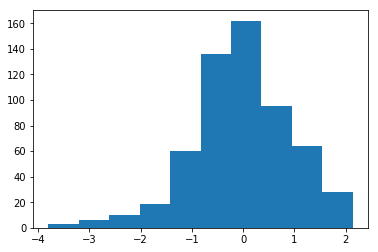

In [12]:
plt.hist((data['TEFF'] - mu_feats[1])/std_feats[1])

(array([  3.,   6.,  10.,  19.,  60., 136., 162.,  95.,  64.,  28.]),
 array([-3.79841564, -3.20459073, -2.61076581, -2.0169409 , -1.42311599,
        -0.82929107, -0.23546616,  0.35835876,  0.95218367,  1.54600858,
         2.1398335 ]),
 <a list of 10 Patch objects>)

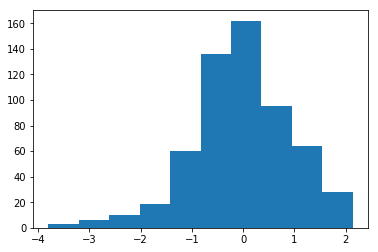

In [13]:
plt.hist(data['TEFF_NORM'])

In [14]:
data.to_csv('../test_data/TestOriginalNorm.csv')